In [1]:
# import pandas as pd
# import random

# class MobilePhoneExplainer:
#     def __init__(self, csv_path):
#         self.csv_path = csv_path
#         self.df = pd.read_csv(csv_path)
#         self.add_explanations()

#     def add_explanations(self):
#         def generate_explanation(row):
#             return (
#                 f"The {row['brand']} {row['model']} launched in {row['launched_year']} features a "
#                 f"{row['Processor']} processor with {row['ram_gb']}GB RAM and {row['storage_gb']}GB storage. "
#                 f"It has a {row['screen_size_inches']}-inch screen and a battery capacity of "
#                 f"{row['battery_capacity_mah']}mAh. The phone sports a {row['front_camera_mp']}MP front camera "
#                 f"and a {row['back_camera_mp']}MP rear camera. It originally launched at Rs {row['launched_price_rs']}."
#             )
#         self.df['explanation'] = self.df.apply(generate_explanation, axis=1)

#     def save_with_explanations(self, output_path):
#         self.df.to_csv(output_path, index=False)
#         print(f"Data saved to {output_path}")

#     def show_random_phone(self):
#         sample = self.df.sample(1).iloc[0]
#         print(f"\nBrand: {sample['brand']}")
#         print(f"Model: {sample['model']}")
#         print(f"Explanation:\n{sample['explanation']}")

#     def search_by_brand_or_model(self, query):
#         filtered = self.df[self.df['brand'].str.contains(query, case=False, na=False) | 
#                            self.df['model'].str.contains(query, case=False, na=False)]
#         if filtered.empty:
#             print(f"No phones found matching '{query}'.")
#         else:
#             for _, row in filtered.iterrows():
#                 print(f"\nBrand: {row['brand']}")
#                 print(f"Model: {row['model']}")
#                 print(f"Explanation:\n{row['explanation']}")

# def main():
#     explainer = MobilePhoneExplainer(r"C:\ziya_workspace\ziya_data_science\Projects\file_cleaned.csv")  # Change filename here
#     explainer.save_with_explanations("mobile_data_with_explanations.csv")

#     while True:
#         print("\nOptions:\n1. Show random phone\n2. Search phone by brand/model\n3. Exit")
#         choice = input("Enter your choice (1/2/3): ").strip()
#         if choice == '1':
#             explainer.show_random_phone()
#         elif choice == '2':
#             q = input("Enter brand or model to search: ").strip()
#             explainer.search_by_brand_or_model(q)
#         elif choice == '3':
#             print("Goodbye!")
#             break
#         else:
#             print("Invalid choice. Try again.")

# if __name__ == "__main__":
#     main()


In [2]:

#! Lets import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:

#! Load dataset
df = pd.read_csv("C:\ziya_workspace\ziya_data_science\excel_files\mobile_data.csv", encoding="latin1")

In [4]:

#! DATA 
df

,Brand,Model,Weight,Ram,Front_Camera,Back_Camera,Processor,Battery_Capacity,Screen_Size,Launched_Price,Launched_Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"INR 79,999",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"INR 84,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"INR 89,999",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"INR 89,999",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"INR 94,999",2024
...,...,...,...,...,...,...,...,...,...,...,...
925,Poco,Pad 5G 128GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"INR 23,999",2024
926,Poco,Pad 5G 256GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"INR 25,999",2024
927,Samsung,Galaxy Z Fold6 256GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"INR 164,999",2024
928,Samsung,Galaxy Z Fold6 512GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"INR 176,999",2024


In [5]:

#! lets see how big is data
print("Rows, Columns",df.shape)

Rows, Columns (930, 11)


In [6]:

#! lets store our columns for clear understanding in list
def list1():
    list1 = []
    for i in df.columns:
        list1.append(i)

    print(list1)    
list1()    

['Brand', 'Model', 'Weight', 'Ram', 'Front_Camera', 'Back_Camera', 'Processor', 'Battery_Capacity', 'Screen_Size', 'Launched_Price', 'Launched_Year']


In [7]:

#! lets get a brief idea about Dtype and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Brand             930 non-null    object
 1   Model             930 non-null    object
 2   Weight            930 non-null    object
 3   Ram               930 non-null    object
 4   Front_Camera      930 non-null    object
 5   Back_Camera       930 non-null    object
 6   Processor         930 non-null    object
 7   Battery_Capacity  930 non-null    object
 8   Screen_Size       930 non-null    object
 9   Launched_Price    930 non-null    object
 10  Launched_Year     930 non-null    int64 
dtypes: int64(1), object(10)
memory usage: 80.1+ KB


In [8]:

#! now lets see the null values
df.isnull().sum()

Brand               0
Model               0
Weight              0
Ram                 0
Front_Camera        0
Back_Camera         0
Processor           0
Battery_Capacity    0
Screen_Size         0
Launched_Price      0
Launched_Year       0
dtype: int64

## **we can see that we dont need all the columns lets drop some non related columns**

In [9]:

#! used list function for fast access columns
list1()

['Brand', 'Model', 'Weight', 'Ram', 'Front_Camera', 'Back_Camera', 'Processor', 'Battery_Capacity', 'Screen_Size', 'Launched_Price', 'Launched_Year']


In [10]:

#! UPDATE THE COLUMNS NAME ACCORDING TO YOUR REQUIREMENTS
df = df.rename(columns={
    'Brand': 'brand',
    'Model': 'model',
    'Weight': 'weight_g',
    'Ram': 'ram_gb',
    'Front_Camera': 'front_camera_mp',
    'Back_Camera': 'back_camera_mp',
    'processor': 'processor',
    'Battery_Capacity': 'battery_capacity_mah',
    'Screen_Size': 'screen_size_inches',
    'Launched_Price': 'launched_price_rs',
    'Launched_Year': 'launched_year'
})


In [11]:

#! UPDATE YOUR CSV
df.to_csv("updated_mobile_data.csv", index=False)

In [12]:
df

,brand,model,weight_g,ram_gb,front_camera_mp,back_camera_mp,Processor,battery_capacity_mah,screen_size_inches,launched_price_rs,launched_year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"INR 79,999",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"INR 84,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"INR 89,999",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"INR 89,999",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"INR 94,999",2024
...,...,...,...,...,...,...,...,...,...,...,...
925,Poco,Pad 5G 128GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"INR 23,999",2024
926,Poco,Pad 5G 256GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"INR 25,999",2024
927,Samsung,Galaxy Z Fold6 256GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"INR 164,999",2024
928,Samsung,Galaxy Z Fold6 512GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"INR 176,999",2024


## **-----------------------------------WARNING DONT RUN THIS-------------------------------------**


In [13]:

! WARNING DONT RUN THIS
import pandas as pd

# Convert weight to int
df['weight_g'] = df['weight_g'].astype(str).str.replace('g', '', regex=False).astype(float).astype(int)

# Clean and convert RAM to int
df['ram_gb'] = df['ram_gb'].astype(str).str.replace('GB', '', regex=False)
df['ram_gb'] = df['ram_gb'].apply(lambda x: eval(x.strip()) if '/' in x else x)
df['ram_gb'] = pd.to_numeric(df['ram_gb'], errors='coerce').fillna(0).astype(int)

# Clean and convert front camera to int
df['front_camera_mp'] = df['front_camera_mp'].astype(str).str.extract(r'(\d+)')[0]
df['front_camera_mp'] = pd.to_numeric(df['front_camera_mp'], errors='coerce').fillna(0).astype(int)

# Clean and convert back camera to int
df['back_camera_mp'] = df['back_camera_mp'].astype(str).str.replace('MP', '', regex=False)
df['back_camera_mp'] = df['back_camera_mp'].str.extract(r'(\d+)')[0]
df['back_camera_mp'] = pd.to_numeric(df['back_camera_mp'], errors='coerce').fillna(0).astype(int)

# Battery cleanup
df['battery_capacity_mah'] = df['battery_capacity_mah'].astype(str).str.replace(',', '').str.replace('mAh', '', regex=False)
df['battery_capacity_mah'] = pd.to_numeric(df['battery_capacity_mah'], errors='coerce').fillna(0).astype(int)

# Screen size conversion
df['screen_size_inches'] = df['screen_size_inches'].astype(str).str.extract(r'(\d+\.\d+)')[0]
df['screen_size_inches'] = pd.to_numeric(df['screen_size_inches'], errors='coerce').fillna(0.0).astype(float)

# Launched price cleanup
df['launched_price_rs'] = df['launched_price_rs'].astype(str).str.replace('INR', '', regex=False).str.replace(',', '')
df['launched_price_rs'] = pd.to_numeric(df['launched_price_rs'], errors='coerce').fillna(0).astype(int)

# Launched year as int
df['launched_year'] = pd.to_numeric(df['launched_year'], errors='coerce').fillna(0).astype(int)

# Extract storage from model and convert to GB
def extract_storage(storage_str):
    if pd.isna(storage_str):
        return 0
    storage_str = storage_str.upper().strip()
    if 'TB' in storage_str:
        return int(float(storage_str.replace('TB', '').strip()) * 1024)
    elif 'GB' in storage_str:
        return int(storage_str.replace('GB', '').strip())
    return 0

# Extract and convert storage
df['storage_gb'] = df['model'].str.extract(r'(\d+\.?\d*\s*(?:GB|TB))')[0].apply(extract_storage)

# Remove storage info from model column
df['model'] = df['model'].str.replace(r'\s*\d+\.?\d*\s*(GB|TB)', '', regex=True).str.strip()

# Remove rows where storage_gb is 0
df = df[df['storage_gb'] != 0].reset_index(drop=True)


'WARNING' is not recognized as an internal or external command,
operable program or batch file.


In [14]:
df

,brand,model,weight_g,ram_gb,front_camera_mp,back_camera_mp,Processor,battery_capacity_mah,screen_size_inches,launched_price_rs,launched_year,storage_gb
0,Apple,iPhone 16,174,6,12,48,A17 Bionic,3600,6.1,79999,2024,128
1,Apple,iPhone 16,174,6,12,48,A17 Bionic,3600,6.1,84999,2024,256
2,Apple,iPhone 16,174,6,12,48,A17 Bionic,3600,6.1,89999,2024,512
3,Apple,iPhone 16 Plus,203,6,12,48,A17 Bionic,4200,6.7,89999,2024,128
4,Apple,iPhone 16 Plus,203,6,12,48,A17 Bionic,4200,6.7,94999,2024,256
...,...,...,...,...,...,...,...,...,...,...,...,...
773,Poco,Pad 5G,571,8,8,8,Snapdragon 7s Gen 2,10000,12.1,23999,2024,128
774,Poco,Pad 5G,571,8,8,8,Snapdragon 7s Gen 2,10000,12.1,25999,2024,256
775,Samsung,Galaxy Z Fold6,239,12,10,50,Snapdragon 8 Gen 3,4400,7.6,164999,2024,256
776,Samsung,Galaxy Z Fold6,239,12,10,50,Snapdragon 8 Gen 3,4400,7.6,176999,2024,512


In [15]:

#! UPDATE YOUR CSV AFTER DOING CHANGES
df.to_csv('file_cleaned.csv', index=False)


In [16]:

#! CHECK FOR NULL VALUES
df.isnull().sum()

brand                   0
model                   0
weight_g                0
ram_gb                  0
front_camera_mp         0
back_camera_mp          0
Processor               0
battery_capacity_mah    0
screen_size_inches      0
launched_price_rs       0
launched_year           0
storage_gb              0
dtype: int64

In [17]:

# #! 100 for training
# df_sample = df.sample(n=100, random_state=42)  # random_state for reproducibility
# df_sample.to_csv('training_data_random_100.csv', index=False)


<Axes: xlabel='brand', ylabel='launched_price_rs'>

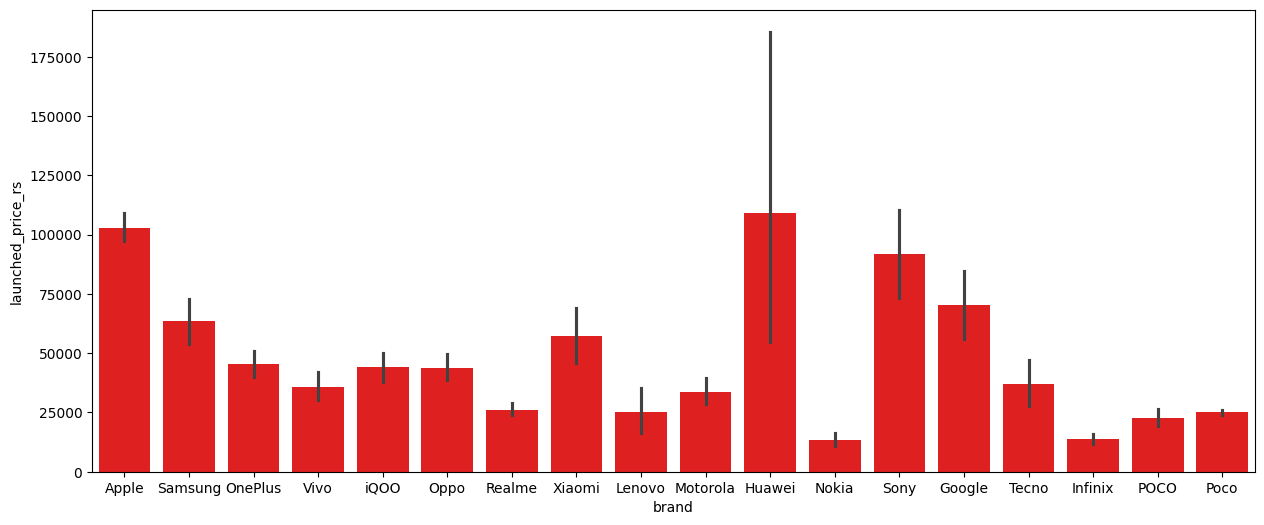

In [18]:

#! GRAPH BETWEEN PRICE AND BRAND
plt.figure(figsize=(15,6))
sns.barplot(x='brand',y='launched_price_rs',data=df, color="red")

<Axes: xlabel='launched_year', ylabel='count'>

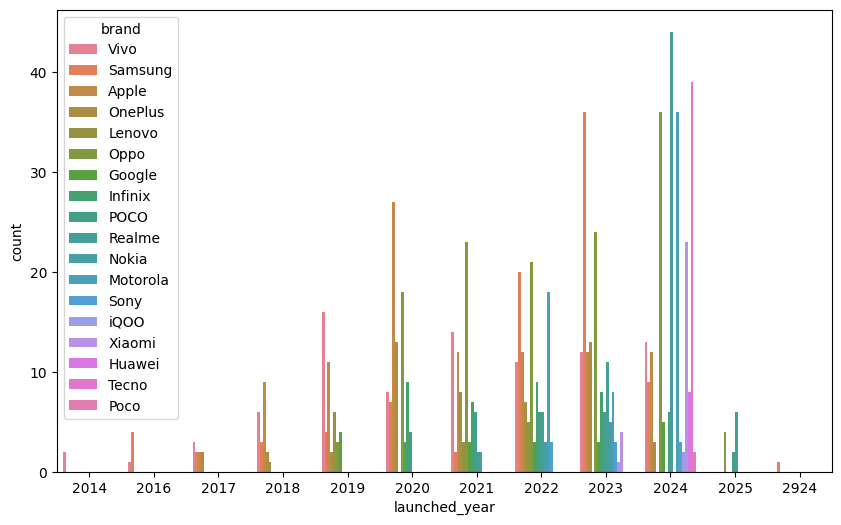

In [19]:

#! GRAPH FOR REPRESENTATION  FOR BRAND AND YEAR 
plt.figure(figsize=(10,6))
sns.countplot(x="launched_year", hue="brand", data=df)

## **in the above plot we can see that there is an outlier in date as 2924**

In [20]:

#! CHECKING FOR THE OUTLIER POSITION
for i in df['launched_year']:
    if i>2025:
        print(i)

2924


In [21]:

#! LOOKING FOR THE ROW WHERE THE OUTLIER IS PRESENT
df[df['launched_year']==2924]

,brand,model,weight_g,ram_gb,front_camera_mp,back_camera_mp,Processor,battery_capacity_mah,screen_size_inches,launched_price_rs,launched_year,storage_gb
99,Samsung,Galaxy S24+,196,8,12,50,Exynos 2400,4800,6.6,89900,2924,128


## **-----------------------------------------------------------NLP-PORTION----------------------------------------------------**

In [22]:

#! HEURISTIC BASED TECHNIQUE FOR FILTERING USER QUERY
import re

def extract_filters(query):
    price_match = re.search(r'(?:under|below|less than)\s*₹?\s*(\d+)', query, re.IGNORECASE)
    battery_match = re.search(r'(\d{3,5})\s*(?:mAh|mah|MAH)', query, re.IGNORECASE)
    storage_match = re.search(r'(\d{2,4})\s*gb', query, re.IGNORECASE)

    filters = {}
    if price_match:
        filters['price_max'] = int(price_match.group(1))
    if battery_match:
        filters['battery_min'] = int(battery_match.group(1))
    if storage_match:
        filters['storage_min'] = int(storage_match.group(1))

    return filters



i want a phone under 30000 with 6000mAH battery and storage of 64gb

Best phones under ₹30000 with 6000mAh battery and 64GB storage

Top smartphones below 30000 with 6000mAh battery and at least 64GB ROM

Phones under 30k with large battery and 64GB internal memory

6000mAh battery 64GB phones below ₹30000 India 2025

Long battery life smartphones under ₹30000 with 64GB storage

Mobile with 64GB storage and 6000mAh battery less than ₹30000

Budget phones under 30000 with massive battery and decent storage

Android phones with 64GB storage 6000mAh battery price below ₹30,000

site:flipkart.com 6000mAh battery 64GB phones under ₹30,000

site:amazon.in phones under 30k with 64GB and big battery

Flipkart mobiles 64GB 6000mAh battery below ₹30,000

Amazon India smartphones 6000mAh battery, 64GB ROM under 30k

Best deals on phones 6000mAh battery 64GB storage under ₹30000

Suggest smartphones under 30,000 INR with 6000mAh battery and 64GB storage

Recommend mobiles below ₹30000 with long-lasting battery and 64GB space

List of budget phones with 6000mAh battery, 64GB internal storage under 30k

I need a phone below ₹30000 having minimum 6000mAh battery and 64GB internal storage

Suggest phones under 30000 with 6000mAh battery and at least 64GB storage



In [23]:

#! ENTER YOUR PROMPT HERE
name = input("enter your name\n")
query = str(input("Enter your prompt"))
print(query)
print(extract_filters(query))

i need a phone under 6000
{'price_max': 6000}


In [24]:
df['launched_price_rs'] = pd.to_numeric(df['launched_price_rs'],errors="coerce")
df['battery_capacity_mah'] = pd.to_numeric(df['battery_capacity_mah'],errors="coerce")
df['storage_gb'] = pd.to_numeric(df['storage_gb'],errors="coerce")

In [25]:

#! STORING FUNCTION UNTO A VARIABLE
filters = extract_filters(query)

In [ ]:
filtered_df = df[
    (df['launched_price_rs']<=filters.get('price_max', float("inf")))
    &
    (df['battery_capacity_mah']>=filters.get('battery_min', 0))
    &
    (df['storage_gb']>=filters.get('storage_min', 0))
]   

from tabulate import tabulate
print(f"Hey {name}, these are the mobile phones according to your requirements:\n")
x = tabulate(filtered_df, headers='keys', tablefmt='grid')
print(x)
ariya six

Hey ziya, these are the mobile phones according to your requirements:

+-----+---------+----------+------------+----------+-------------------+------------------+--------------------+------------------------+----------------------+---------------------+-----------------+--------------+
|     | brand   | model    |   weight_g |   ram_gb |   front_camera_mp |   back_camera_mp | Processor          |   battery_capacity_mah |   screen_size_inches |   launched_price_rs |   launched_year |   storage_gb |
+=====+=========+==========+============+==========+===================+==================+====================+========================+======================+=====================+=================+==============+
| 735 | Infinix | Smart HD |        195 |        2 |                 5 |                8 | MediaTek Helio A20 |                   5000 |                  6.1 |                5999 |            2020 |           32 |
+-----+---------+----------+------------+----------+-------------